# IAA016 - Tópicos em IA

## Aluno Vinícius Trainotti

### Atividade 2 - Caixeiro Viajante com Algoritmos Genéticos

Coordenadas das Cidades:
[(81, 14), (3, 94), (35, 31), (28, 17), (94, 13), (86, 94), (69, 11), (75, 54), (4, 3), (11, 27), (29, 64), (77, 3), (71, 25), (91, 83), (89, 69), (53, 28), (57, 75), (35, 0), (97, 20), (89, 54), (43, 35), (19, 27), (97, 43), (13, 11), (48, 12), (45, 44), (77, 33), (5, 93), (58, 68), (15, 48), (10, 70), (37, 80), (79, 46), (73, 24), (90, 8), (5, 84), (29, 98), (37, 10), (29, 12), (48, 35), (58, 81), (46, 20), (47, 45), (26, 85), (34, 89), (87, 82), (9, 77), (81, 21), (68, 93), (31, 20), (59, 48), (34, 81), (88, 71), (28, 87), (41, 98), (99, 7), (29, 4), (40, 51), (34, 8), (27, 72), (91, 40), (27, 83), (63, 50), (82, 58), (18, 33), (17, 31), (95, 71), (68, 33), (95, 74), (54, 74), (51, 46), (28, 17), (65, 63), (11, 96), (6, 14), (19, 80), (20, 87), (54, 76), (8, 49), (48, 76), (59, 67), (32, 70), (1, 87), (92, 14), (87, 68), (96, 34), (98, 82), (43, 14), (37, 55), (20, 58), (0, 92), (92, 33), (64, 97), (22, 64), (13, 80), (38, 81), (64, 77), (25, 19), (47, 97), 

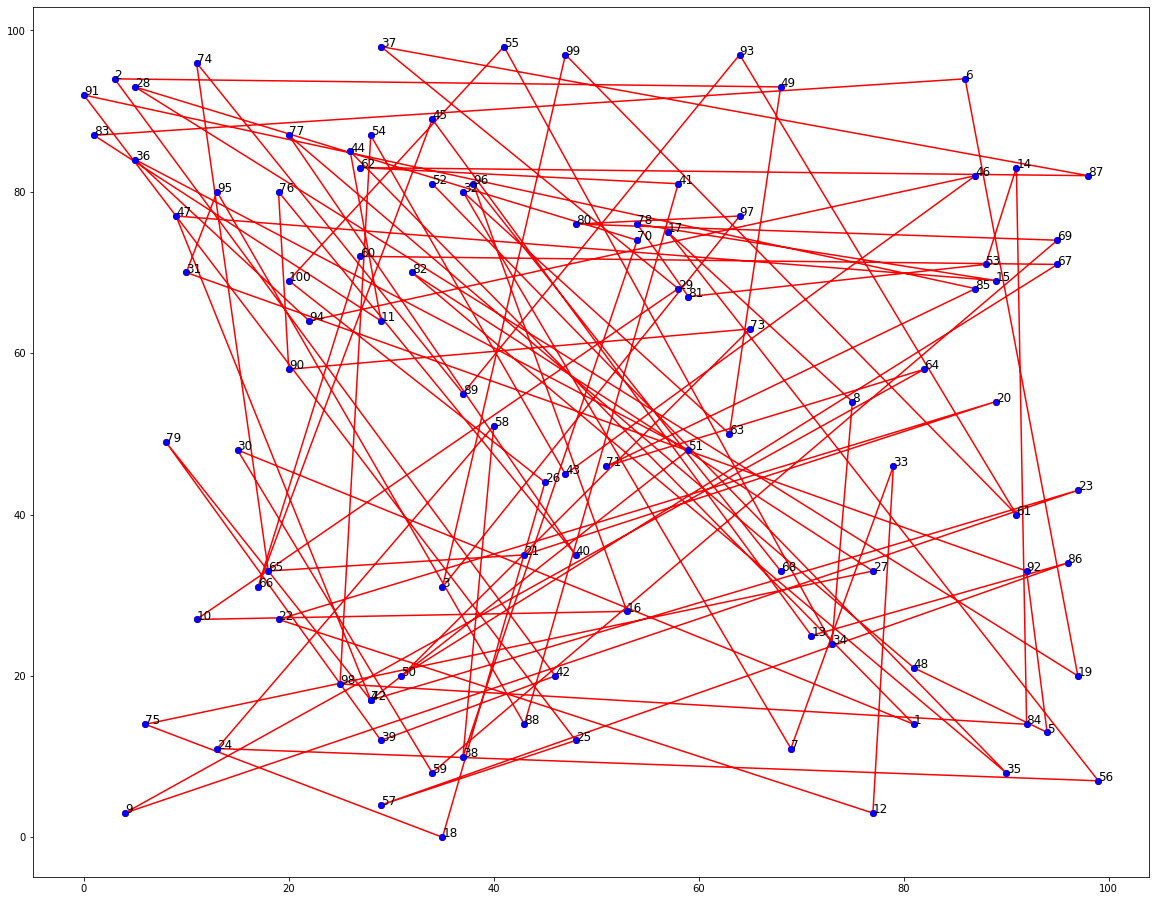

In [26]:
import random
import matplotlib.pyplot as plt
import math

random.seed(42)

# Define o número de cidades
num_cities = 100

# Gera as coordenadas das cidades aleatoriamente 100x100
cities = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_cities)]
print("Coordenadas das Cidades:", cities)

# Define o tamanho da população
population_size = 100

# Define o número de gerações
num_generations = 500

# Define a taxa de crossover (60%)
crossover_rate = 0.6

# Define a taxa de mutação (1%)
mutation_rate = 0.01

def distance(city1, city2):
    """
    Função de cálculo da distância entre duas cidades
    """
    p1 = city1[0]-city2[0]
    p2 = city1[1]-city2[1]
    dist = math.sqrt(math.pow(p1,2) + math.pow(p2,2))
    return dist

def total_distance(route):
    """
    Função para calcular do custo (distância total) de um rota
    """
    return sum(distance(cities[route[i]], cities[route[i+1]]) for i in range(num_cities-1)) + distance(cities[route[num_cities-1]], cities[route[0]])

def fitness(route):
  """
  Função para calcular o inverso da distância
  """
  return 1 / total_distance(route)

def selection(population):
    """
    Define a função de seleção de soluções mais aptas
    1. Calcula o fitness de cada individuo da população
    2. Combina os individuos com seus respetivos fitness em lista de tuplas
    3. Ordena a população pelo fitness decrescente (inverso)
    4. Seleciona os 50%
    """
    fitness_scores = [fitness(individual) for individual in population]
    scored_population = list(zip(population, fitness_scores))
    scored_population.sort(key=lambda x: x[1], reverse=True)
    selected = [individual for individual, score in scored_population[:population_size//2]]
    return selected

def crossover(parent1, parent2):
    """
    Função de crossover com corte aleatório
    """
    cut = random.randint(0, num_cities-1)
    child1 = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
    child2 = parent2[:cut] + [city for city in parent1 if city not in parent2[:cut]]
    return child1, child2

# Define a função de mutação
def mutation(route):
    """
    Função de mutação, escolhe duas posições aleatórias na rota para troca de posições
    """
    position_random = 2
    i, j = random.sample(range(num_cities), position_random)
    route[i], route[j] = route[j], route[i]
    return route

# Cria a população inicial de soluções aleatórias
population = [random.sample(range(num_cities), num_cities) for i in range(population_size)]
print("População inicial: ", population)

# Executa as gerações do algoritmo genético
for generation in range(num_generations):
    # Seleciona as soluções mais aptas
    selected = selection(population)
    # Cria a nova população com os filhos do crossover
    new_population = []
    while len(new_population) < population_size - len(selected):
        # Seleciona dois pais aleatórios
        parent1, parent2 = random.sample(selected, 2)
        # Verifica se realiza o crossover com base na taxa definida
        if random.random() < crossover_rate:
            # Realiza o crossover
            child1, child2 = crossover(parent1, parent2)
            # Adiciona os filhos à nova população
            new_population.append(child1)
            new_population.append(child2)
        else:
            # Adiciona os pais à nova população (sem crossover)
            new_population.append(parent1)
            new_population.append(parent2)
    # Adiciona os filhos e os melhores indivíduos selecionados à nova população
    new_population += selected
    # Realiza a mutação em cada indivíduo da nova população com base na taxa definida
    for i in range(population_size):
        if random.random() < mutation_rate:
            new_population[i] = mutation(new_population[i])
    # Atualiza a população
    population = new_population
    # Exibe o custo da melhor solução encontrada até agora
    best_distance = total_distance(selected[0])
    print("Generation ", generation, " - Best Distance: ", best_distance)

# Exibe a melhor rota encontrada
best_route = selected[0]
print("Best Route: ", best_route)

route_coordinates = [cities[city-1] for city in best_route]

plt.figure(figsize=(20, 16))

# Traça a rota das cidades
x = [coord[0] for coord in route_coordinates]
y = [coord[1] for coord in route_coordinates]
plt.plot(x, y, 'ro-')

for i, coord in enumerate(cities):
    plt.plot(coord[0], coord[1], 'bo')
    plt.text(coord[0], coord[1], str(i+1), fontsize=12)

# Mostra o gráfico
plt.show()